# TP2 Jeu de données Salary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("SALARY.csv")
df.head()

,age,statut,chiffre,etudes,nombre_annee_etudes,situation_familiale_un,secteur_activite,situation_familiale_deux,ethnie,genre,plus_values,moins_value,nombre_heure_semaine,pays_naissance,S
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
df = df.drop('chiffre', axis=1)

In [3]:
df.head()

,age,statut,etudes,nombre_annee_etudes,situation_familiale_un,secteur_activite,situation_familiale_deux,ethnie,genre,plus_values,moins_value,nombre_heure_semaine,pays_naissance,S
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Avant d'effectuer une visualisation des données, on séparer notre base en appretissage/test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# On récupère nos X et nos y
X = df.iloc[:,0:13]
y = df.iloc[:,13:14]

# transformation deS labels avec le labelEncoder
y = y.apply(LabelEncoder().fit_transform)
y

,S
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [5]:
# OneHotEncoder pour les features qui ne sont pas ordinales donc toutes les features sauf "etudes"
from sklearn.preprocessing import OneHotEncoder

X = pd.concat([X, pd.get_dummies(X['statut'], prefix='statut')], axis=1)
X = pd.concat([X, pd.get_dummies(X['situation_familiale_un'], prefix='sf1')], axis=1)
X = pd.concat([X, pd.get_dummies(X['secteur_activite'], prefix='se')], axis=1)
X = pd.concat([X, pd.get_dummies(X['situation_familiale_deux'], prefix='sf2')], axis=1)
X = pd.concat([X, pd.get_dummies(X['ethnie'], prefix='et')], axis=1)
X = pd.concat([X, pd.get_dummies(X['genre'], prefix='s')], axis=1)
X = pd.concat([X, pd.get_dummies(X['pays_naissance'], prefix='pn')], axis=1)

In [6]:
#On supprime nos variables qualitatives
del X['statut']
del X['situation_familiale_un']
del X['secteur_activite']
del X['situation_familiale_deux']
del X['ethnie']
del X['genre']
del X['pays_naissance']

In [7]:
# OrdinalEncoder pour les features qui sont ordinales donc seulement la feature "etudes"
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit(X[["etudes"]])
X[["etudes"]] = enc.transform(X[["etudes"]])
X.head()

,age,etudes,nombre_annee_etudes,plus_values,moins_value,nombre_heure_semaine,statut_ ?,statut_ Federal-gov,statut_ Local-gov,statut_ Never-worked,...,pn_ Portugal,pn_ Puerto-Rico,pn_ Scotland,pn_ South,pn_ Taiwan,pn_ Thailand,pn_ Trinadad&Tobago,pn_ United-States,pn_ Vietnam,pn_ Yugoslavia
0,39,9.0,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,9.0,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,11.0,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,1.0,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,9.0,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

scaler = sc.fit(X)
X_scaled = scaler.transform(X)

print(X_scaled)

[[ 0.03067056 -0.33543693  1.13473876 ...  0.34095391 -0.04540836
  -0.02217266]
 [ 0.83710898 -0.33543693  1.13473876 ...  0.34095391 -0.04540836
  -0.02217266]
 [-0.04264203  0.18133163 -0.42005962 ...  0.34095391 -0.04540836
  -0.02217266]
 ...
 [ 1.42360965  0.18133163 -0.42005962 ...  0.34095391 -0.04540836
  -0.02217266]
 [-1.21564337  0.18133163 -0.42005962 ...  0.34095391 -0.04540836
  -0.02217266]
 [ 0.98373415  0.18133163 -0.42005962 ...  0.34095391 -0.04540836
  -0.02217266]]


In [9]:
#On sépare nos données en train et en test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

data_train_df = (X_train, y_train)

data_test_df = (X_test, y_test)

## MLP Classifier

In [10]:
# entrainement du mlp classifier sur la base train
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold

clf_mlp = MLPClassifier(hidden_layer_sizes = (10,5), max_iter=300, activation = 'relu', solver = 'adam')
clf_mlp.fit(X_train, y_train)

C:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=300)

In [11]:
# on applique une cross validation sur la base train splitée en 5
from sklearn.model_selection import cross_val_score

score_mlp = cross_val_score(clf_mlp, X_train, y_train, cv=5)
score_mlp_test = clf_mlp.score(X_test,y_test)
print("Accuracy à chaque Fold sur la base train : ", score_mlp)
print("Accuracy sur l'ensemble de la base train : ", score_mlp.mean())
print("Accuracy sur la base test : ", score_mlp_test)

C:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

Accuracy à chaque Fold sur la base train :  [0.84163194 0.8466769  0.8532251  0.84861781 0.84488811]
Accuracy sur l'ensemble de la base train :  0.847007972407211
Accuracy sur la base test :  0.8499334629951889


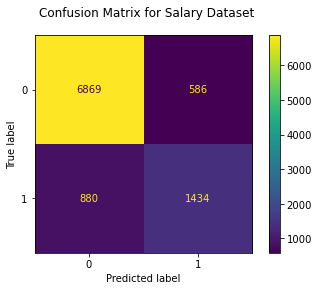

In [12]:
#Matrice de confusion sur la base test 
from sklearn.metrics import plot_confusion_matrix

fig = plot_confusion_matrix(clf_mlp, X_test, y_test, display_labels=clf_mlp.classes_)
fig.figure_.suptitle("Confusion Matrix for Salary Dataset")
plt.show()

## SVM Linéaire

In [13]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

clf_svc = LinearSVC(C=1, loss="hinge", random_state=42).fit(X_train, y_train)
score_svc = cross_val_score(clf_svc, X_train, y_train, cv=5, scoring="accuracy")

print("Accuracy à chaque Fold sur la base train : ", score_svc)
print("Accuracy sur l'ensemble de la base train : ", score_svc.mean())
print("Accuracy sur la base test :",clf_svc.score(X_test,y_test))

C:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Logiciels\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Logiciels\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:63

Accuracy à chaque Fold sur la base train :  [0.84843167 0.85128318 0.849276   0.85454147 0.85146994]
Accuracy sur l'ensemble de la base train :  0.8510004513010203
Accuracy sur la base test : 0.8526973078104207


C:\Logiciels\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


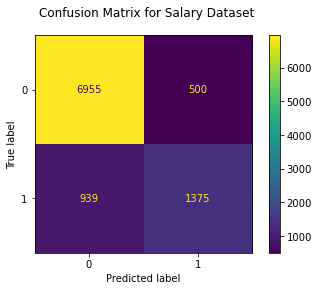

In [14]:
fig = plot_confusion_matrix(clf_svc, X_test, y_test, display_labels=clf_svc.classes_)
fig.figure_.suptitle("Confusion Matrix for Salary Dataset")
plt.show()

## SVM non linéaire

In [15]:
import matplotlib.pyplot as plt
from sklearn import svm

# fit the model
clf_nsvc = svm.SVC(kernel = "rbf", gamma=0.1, C=1)
clf_nsvc.fit(X_train, y_train)

C:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=1, gamma=0.1)

In [16]:
score_nsvc = cross_val_score(clf_nsvc, X_train, y_train, cv=5, scoring="accuracy")

print("Accuracy à chaque Fold sur la base train : ", score_nsvc)
print("Accuracy sur l'ensemble de la base train : ", score_nsvc.mean())
print("Accuracy sur la base test :",clf_nsvc.score(X_test,y_test))

C:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

Accuracy à chaque Fold sur la base train :  [0.83263874 0.83461285 0.83764809 0.83852567 0.83084686]
Accuracy sur l'ensemble de la base train :  0.834854442668264
Accuracy sur la base test : 0.8374449790152523


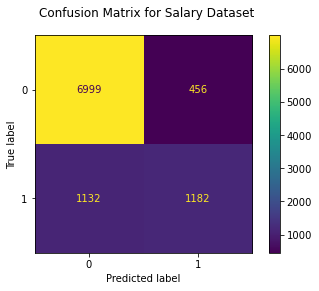

In [19]:
fig = plot_confusion_matrix(clf_nsvc, X_test, y_test, display_labels=clf_nsvc.classes_)
fig.figure_.suptitle("Confusion Matrix for Salary Dataset")
plt.show()

## Decision trees

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf_dtrees = DecisionTreeClassifier(criterion="entropy", max_depth=6)
clf_dtrees.fit(X_train,y_train)

score_dtrees = cross_val_score(clf_dtrees, X_train, y_train, cv=5, scoring="accuracy")

print("Accuracy à chaque Fold sur la base train : ", score_dtrees)
print("Accuracy sur l'ensemble de la base train : ", score_dtrees.mean())
print("Accuracy sur la base test :",clf_dtrees.score(X_test,y_test))

Accuracy à chaque Fold sur la base train :  [0.84930906 0.84492213 0.85125055 0.85103115 0.85607723]
Accuracy sur l'ensemble de la base train :  0.8505180240811299
Accuracy sur la base test : 0.8525949431876344


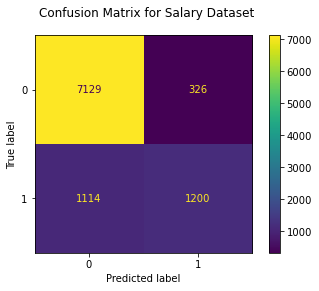

In [18]:
fig = plot_confusion_matrix(clf_dtrees, X_test, y_test, display_labels=clf_dtrees.classes_)
fig.figure_.suptitle("Confusion Matrix for Salary Dataset")
plt.show()

In [20]:
X_scaled.shape

(32561, 92)